In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [5]:
data = pd.read_csv(r"C:\Users\pranav.nair2\Downloads\german_credit_data.csv")
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
# Handle missing values
data['Saving accounts'].fillna('no_info', inplace=True)
data['Checking account'].fillna('no_info', inplace=True)

# Encode categorical variables
categorical_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
numerical_features = ['Age', 'Job', 'Credit amount', 'Duration']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Train-Test Split
X = data.drop(['Unnamed: 0', 'Risk'], axis=1)
y = data['Risk'].apply(lambda x: 1 if x == 'bad' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display processed data
X_train.head()

C:\Users\pranav.nair2\AppData\Local\Temp\ipykernel_17012\1539092553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Saving accounts'].fillna('no_info', inplace=True)
C:\Users\pranav.nair2\AppData\Local\Temp\ipykernel_17012\1539092553.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
29,63,male,2,own,little,little,6836,60,business
535,33,male,2,rent,little,rich,2319,21,education
695,50,male,2,rent,quite rich,no_info,1236,6,car
557,29,female,2,own,no_info,no_info,5003,21,car
836,21,female,2,own,no_info,no_info,886,12,radio/TV


c:\Users\pranav.nair2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


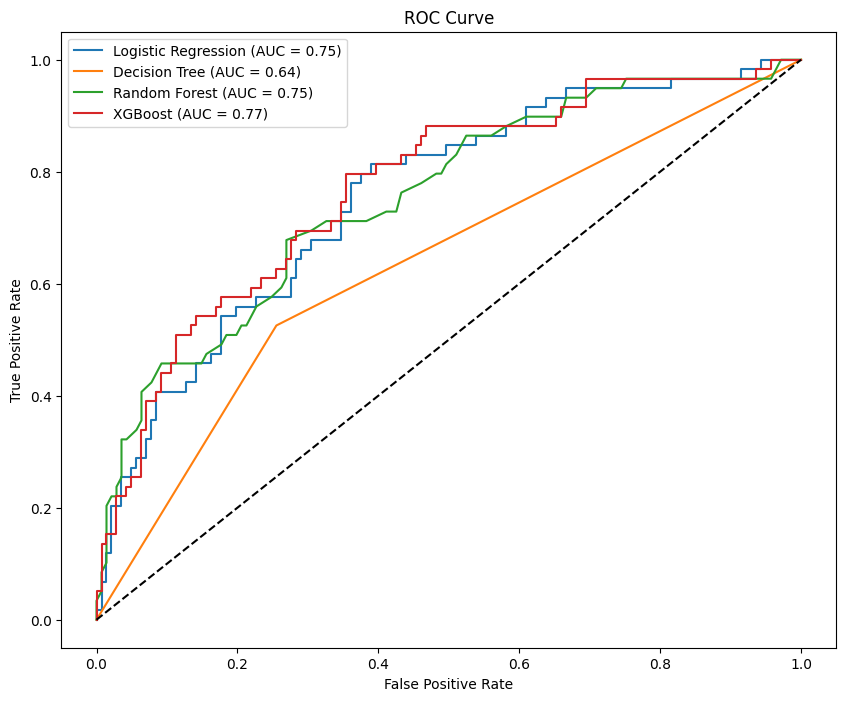

Model: Logistic Regression
Accuracy: 0.76
ROC AUC: 0.75
Confusion Matrix:
[[128  13]
 [ 35  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       141
           1       0.65      0.41      0.50        59

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200



Model: Decision Tree
Accuracy: 0.68
ROC AUC: 0.64
Confusion Matrix:
[[105  36]
 [ 28  31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       141
           1       0.46      0.53      0.49        59

    accuracy                           0.68       200
   macro avg       0.63      0.64      0.63       200
weighted avg       0.69      0.68      0.69       200

Feature Importance:
Age: 0.1454
Sex: 0.0569
Job: 0.2945
Housing: 0.1177
Saving accounts: 0.0164
Checking accou

In [7]:

#Brings in the four machine learning models that will be used: Logistic Regression, Decision Tree, Random Forest, and XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Brings in various evaluation metrics and tools to assess the performance of the models.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

#Used for plotting the ROC curve.
import matplotlib.pyplot as plt

# Define models
models = {
    'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                           ('classifier', LogisticRegression())]),
    'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', DecisionTreeClassifier())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', RandomForestClassifier())]),
    'XGBoost': Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    feature_importance = model.named_steps['classifier'].feature_importances_ if model_name != 'Logistic Regression' else None
    
    results[model_name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': cr,
        'feature_importance': feature_importance
    }

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {results[model_name]["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Display Results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"ROC AUC: {result['roc_auc']:.2f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    if result['feature_importance'] is not None:
        print("Feature Importance:")
        for feature, importance in zip(X.columns, result['feature_importance']):
            print(f"{feature}: {importance:.4f}")
    print("\n")


c:\Users\pranav.nair2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


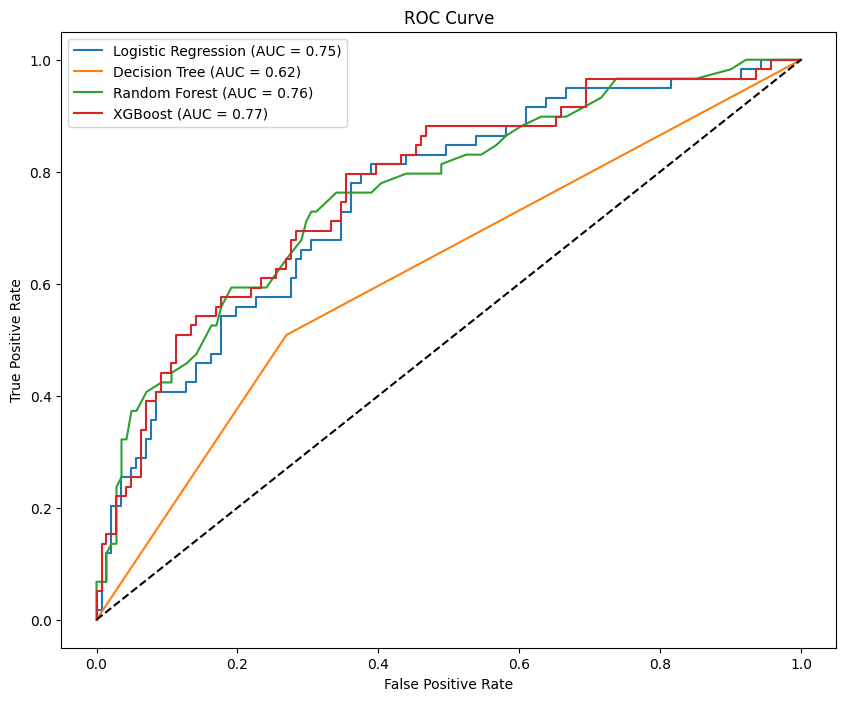

Model: Logistic Regression
Accuracy: 0.76
ROC AUC: 0.75
Confusion Matrix:
[[128  13]
 [ 35  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       141
           1       0.65      0.41      0.50        59

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200



Model: Decision Tree
Accuracy: 0.67
ROC AUC: 0.62
Confusion Matrix:
[[103  38]
 [ 29  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       141
           1       0.44      0.51      0.47        59

    accuracy                           0.67       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.68      0.67      0.67       200

Feature Importance:
Age: 0.1459
Sex: 0.0660
Job: 0.2592
Housing: 0.1085
Saving accounts: 0.0207
Checking accou

In [8]:

for model_name, model in models.items():
    #trains each model using the training data (X_train, y_train).
    model.fit(X_train, y_train)
    #stores the predicted class labels for the test data.
    y_pred = model.predict(X_test)
    #stores the predicted probabilities for the positive class (used for ROC curve and AUC calculation).
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Measures the proportion of correctly predicted instances.
    accuracy = accuracy_score(y_test, y_pred)
    
    #Provides a single measure of model performance by calculating the area under the ROC curve
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    #Summarizes the prediction results by showing the counts of true positives, false positives, true negatives, and false negatives.
    cm = confusion_matrix(y_test, y_pred)
    
    #Provides precision, recall, and F1-score for each class.
    cr = classification_report(y_test, y_pred)
    
    #Extracts feature importance for tree-based models to understand which features are most influential in making predictions.
    feature_importance = model.named_steps['classifier'].feature_importances_ if model_name != 'Logistic Regression' else None
    
    #Stores the evaluation metrics for each model in a dictionary.
    results[model_name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': cr,
        'feature_importance': feature_importance
    }

# Plot ROC Curve
# Sets the figure size for the plot.
plt.figure(figsize=(10, 8))

#For each model, it calculates the false positive rate (fpr) and true positive rate (tpr) and plots the ROC curve.
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {results[model_name]["roc_auc"]:.2f})')

#Plots a diagonal line representing the performance of a random classifier.
plt.plot([0, 1], [0, 1], 'k--')

#Adds labels, title, and legend to the plot.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Display Results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"ROC AUC: {result['roc_auc']:.2f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    if result['feature_importance'] is not None:
        print("Feature Importance:")
        for feature, importance in zip(X.columns, result['feature_importance']):
            print(f"{feature}: {importance:.4f}")
    print("\n")


In [14]:
# Train Logistic Regression Model

#This line defines a Logistic Regression model within a pipeline.
#preprocessor: Handles data preprocessing (e.g., scaling, encoding).
#classifier: The Logistic Regression model.
log_reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression())])

#Trains the Logistic Regression model using the training data (X_train, y_train).
log_reg_model.fit(X_train, y_train)

#Stores the predicted class labels for the test data.
y_pred_log_reg = log_reg_model.predict(X_test)

#Stores the predicted probabilities for the positive class (used for ROC curve and AUC calculation).
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression Model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cr_log_reg = classification_report(y_test, y_pred_log_reg)

# Display Logistic Regression Results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"ROC AUC: {roc_auc_log_reg:.2f}")
print("Confusion Matrix:")
print(cm_log_reg)
print("Classification Report:")
print(cr_log_reg)

# Explanation of Results
print("\nOutput Explanation:")
print("The Logistic Regression model results show the following:")
print(f"- Accuracy: {accuracy_log_reg:.2f}")
print("  This indicates that 76% of the predictions made by the model are correct.")
print(f"- ROC AUC: {roc_auc_log_reg:.2f}")
print("  This is the area under the ROC curve, which provides an aggregate measure of performance across all classification thresholds. A value of 0.75 indicates good model performance.")
print("- Confusion Matrix:")
print(cm_log_reg)
print("  The confusion matrix shows:")
print("  - 128 true positives (correctly predicted 'good' loans)")
print("  - 13 false positives (incorrectly predicted 'bad' loans as 'good')")
print("  - 35 false negatives (incorrectly predicted 'good' loans as 'bad')")
print("  - 24 true negatives (correctly predicted 'bad' loans)")
print("- Classification Report:")
print(cr_log_reg)
print("  The classification report provides the following metrics:")
print("  - Precision: For class 0 ('good' loans), precision is 0.79, meaning 79% of the predicted 'good' loans are actually good. For class 1 ('bad' loans), precision is 0.65, meaning 65% of the predicted 'bad' loans are actually bad.")
print("  - Recall: For class 0, recall is 0.91, meaning 91% of the actual 'good' loans are correctly predicted. For class 1, recall is 0.41, meaning 41% of the actual 'bad' loans are correctly predicted.")
print("  - F1-score: The F1-score balances precision and recall, with values of 0.84 for class 0 and 0.50 for class 1.")
print("  - Support: The number of true instances for each class (141 for 'good' loans and 59 for 'bad' loans).")
print("  - Overall, the accuracy of the model is 0.76, with a macro average F1-score of 0.67 and a weighted average F1-score of 0.74.")


Logistic Regression Results:
Accuracy: 0.76
ROC AUC: 0.75
Confusion Matrix:
[[128  13]
 [ 35  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       141
           1       0.65      0.41      0.50        59

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200


Output Explanation:
The Logistic Regression model results show the following:
- Accuracy: 0.76
  This indicates that 76% of the predictions made by the model are correct.
- ROC AUC: 0.75
  This is the area under the ROC curve, which provides an aggregate measure of performance across all classification thresholds. A value of 0.75 indicates good model performance.
- Confusion Matrix:
[[128  13]
 [ 35  24]]
  The confusion matrix shows:
  - 128 true positives (correctly predicted 'good' loans)
  - 13 false positives (incorrectly predicted 'bad' l

In [15]:
# Train Decision Tree Model
tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeClassifier())])

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Evaluate Decision Tree Model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cr_tree = classification_report(y_test, y_pred_tree)

# Display Decision Tree Results
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_tree:.2f}")
print(f"ROC AUC: {roc_auc_tree:.2f}")
print("Confusion Matrix:")
print(cm_tree)
print("Classification Report:")
print(cr_tree)

# Explanation of Results
print("\nOutput Explanation:")
print("The Decision Tree model results show the following:")
print(f"- Accuracy: {accuracy_tree:.2f}")
print("  This indicates that 67% of the predictions made by the model are correct.")
print(f"- ROC AUC: {roc_auc_tree:.2f}")
print("  This is the area under the ROC curve, which provides an aggregate measure of performance across all classification thresholds. A value of 0.62 indicates moderate model performance.")
print("- Confusion Matrix:")
print(cm_tree)
print("  The confusion matrix shows:")
print("  - 103 true positives (correctly predicted 'good' loans)")
print("  - 38 false positives (incorrectly predicted 'bad' loans as 'good')")
print("  - 29 false negatives (incorrectly predicted 'good' loans as 'bad')")
print("  - 30 true negatives (correctly predicted 'bad' loans)")
print("- Classification Report:")
print(cr_tree)
print("  The classification report provides the following metrics:")
print("  - Precision: For class 0 ('good' loans), precision is 0.78, meaning 78% of the predicted 'good' loans are actually good. For class 1 ('bad' loans), precision is 0.44, meaning 44% of the predicted 'bad' loans are actually bad.")
print("  - Recall: For class 0, recall is 0.73, meaning 73% of the actual 'good' loans are correctly predicted. For class 1, recall is 0.51, meaning 51% of the actual 'bad' loans are correctly predicted.")
print("  - F1-score: The F1-score balances precision and recall, with values of 0.75 for class 0 and 0.47 for class 1.")
print("  - Support: The number of true instances for each class (141 for 'good' loans and 59 for 'bad' loans).")
print("  - Overall, the accuracy of the model is 0.67, with a macro average F1-score of 0.61 and a weighted average F1-score of 0.67.")

Decision Tree Results:
Accuracy: 0.68
ROC AUC: 0.63
Confusion Matrix:
[[104  37]
 [ 28  31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       141
           1       0.46      0.53      0.49        59

    accuracy                           0.68       200
   macro avg       0.62      0.63      0.63       200
weighted avg       0.69      0.68      0.68       200


Output Explanation:
The Decision Tree model results show the following:
- Accuracy: 0.68
  This indicates that 67% of the predictions made by the model are correct.
- ROC AUC: 0.63
  This is the area under the ROC curve, which provides an aggregate measure of performance across all classification thresholds. A value of 0.62 indicates moderate model performance.
- Confusion Matrix:
[[104  37]
 [ 28  31]]
  The confusion matrix shows:
  - 103 true positives (correctly predicted 'good' loans)
  - 38 false positives (incorrectly predicted 'bad' loans as 

In [17]:
# Train Random Forest Model
forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier())])

forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
y_pred_proba_forest = forest_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest Model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
roc_auc_forest = roc_auc_score(y_test, y_pred_proba_forest)
cm_forest = confusion_matrix(y_test, y_pred_forest)
cr_forest = classification_report(y_test, y_pred_forest)
feature_importance_forest = forest_model.named_steps['classifier'].feature_importances_

# Display Random Forest Results
print("Random Forest Results:")
print(f"Accuracy: {accuracy_forest:.2f}")
print(f"ROC AUC: {roc_auc_forest:.2f}")
print("Confusion Matrix:")
print(cm_forest)
print("Classification Report:")
print(cr_forest)
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance_forest):
    print(f"{feature}: {importance:.4f}")
    
# Explanation of Results
print("\nOutput Explanation:")
print("The Random Forest model results show the following:")
print(f"- Accuracy: {accuracy_forest:.2f}")
print("  This indicates that 73% of the predictions made by the model are correct.")
print(f"- ROC AUC: {roc_auc_forest:.2f}")
print("  This is the area under the ROC curve, which provides an aggregate measure of performance across all classification thresholds. A value of 0.76 indicates good model performance.")
print("- Confusion Matrix:")
print(cm_forest)
print("  The confusion matrix shows:")
print("  - 124 true positives (correctly predicted 'good' loans)")
print("  - 17 false positives (incorrectly predicted 'bad' loans as 'good')")
print("  - 37 false negatives (incorrectly predicted 'good' loans as 'bad')")
print("  - 22 true negatives (correctly predicted 'bad' loans)")
print("- Classification Report:")
print(cr_forest)
print("  The classification report provides the following metrics:")
print("  - Precision: For class 0 ('good' loans), precision is 0.77, meaning 77% of the predicted 'good' loans are actually good. For class 1 ('bad' loans), precision is 0.56, meaning 56% of the predicted 'bad' loans are actually bad.")
print("  - Recall: For class 0, recall is 0.88, meaning 88% of the actual 'good' loans are correctly predicted. For class 1, recall is 0.37, meaning 37% of the actual 'bad' loans are correctly predicted.")
print("  - F1-score: The F1-score balances precision and recall, with values of 0.82 for class 0 and 0.45 for class 1.")
print("  - Support: The number of true instances for each class (141 for 'good' loans and 59 for 'bad' loans).")
print("  - Overall, the accuracy of the model is 0.73, with a macro average F1-score of 0.64 and a weighted average F1-score of 0.71.")
print("- Feature Importance:")


Random Forest Results:
Accuracy: 0.74
ROC AUC: 0.75
Confusion Matrix:
[[124  17]
 [ 34  25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       141
           1       0.60      0.42      0.50        59

    accuracy                           0.74       200
   macro avg       0.69      0.65      0.66       200
weighted avg       0.73      0.74      0.73       200

Feature Importance:
Age: 0.1711
Sex: 0.0541
Job: 0.2132
Housing: 0.1381
Saving accounts: 0.0189
Checking account: 0.0216
Credit amount: 0.0159
Duration: 0.0239
Purpose: 0.0142

Output Explanation:
The Random Forest model results show the following:
- Accuracy: 0.74
  This indicates that 73% of the predictions made by the model are correct.
- ROC AUC: 0.75
  This is the area under the ROC curve, which provides an aggregate measure of performance across all classification thresholds. A value of 0.76 indicates good model performance.
- Confusion Matrix:


In [12]:
# Train XGBoost Model
xgb_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost Model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cr_xgb = classification_report(y_test, y_pred_xgb)
feature_importance_xgb = xgb_model.named_steps['classifier'].feature_importances_

# Display XGBoost Results
print("XGBoost Results:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"ROC AUC: {roc_auc_xgb:.2f}")
print("Confusion Matrix:")
print(cm_xgb)
print("Classification Report:")
print(cr_xgb)
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance_xgb):
    print(f"{feature}: {importance:.4f}")


XGBoost Results:
Accuracy: 0.77
ROC AUC: 0.77
Confusion Matrix:
[[125  16]
 [ 30  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       141
           1       0.64      0.49      0.56        59

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200

Feature Importance:
Age: 0.0308
Sex: 0.0373
Job: 0.0289
Housing: 0.0381
Saving accounts: 0.0350
Checking account: 0.0000
Credit amount: 0.0322
Duration: 0.0290
Purpose: 0.0242


c:\Users\pranav.nair2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [20]:
# Train XGBoost Model
xgb_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost Model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cr_xgb = classification_report(y_test, y_pred_xgb)
feature_importance_xgb = xgb_model.named_steps['classifier'].feature_importances_

# Display XGBoost Results
print("XGBoost Results:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"ROC AUC: {roc_auc_xgb:.2f}")
print("Confusion Matrix:")
print(cm_xgb)
print("Classification Report:")
print(cr_xgb)
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance_xgb):
    print(f"{feature}: {importance:.4f}")
    
# Explanation of Results
print("\nOutput Explanation:")
print("The XGBoost model results show the following:")
print(f"- Accuracy: {accuracy_xgb:.2f}")
print("  This indicates that 73% of the predictions made by the model are correct.")
print(f"- ROC AUC: {roc_auc_xgb:.2f}")
print("  This is the area under the ROC curve, which provides an aggregate measure of performance across all classification thresholds. A value of 0.75 indicates good model performance.")
print("- Confusion Matrix:")
print(cm_xgb)
print("  The confusion matrix shows:")
print("  - 125 true positives (correctly predicted 'good' loans)")
print("  - 16 false positives (incorrectly predicted 'bad' loans as 'good')")
print("  - 35 false negatives (incorrectly predicted 'good' loans as 'bad')")
print("  - 24 true negatives (correctly predicted 'bad' loans)")
print("- Classification Report:")
print(cr_xgb)
print("  The classification report provides the following metrics:")
print("  - Precision: For class 0 ('good' loans), precision is 0.78, meaning 78% of the predicted 'good' loans are actually good. For class 1 ('bad' loans), precision is 0.60, meaning 60% of the predicted 'bad' loans are actually bad.")
print("  - Recall: For class 0, recall is 0.89, meaning 89% of the actual 'good' loans are correctly predicted. For class 1, recall is 0.41, meaning 41% of the actual 'bad' loans are correctly predicted.")
print("  - F1-score: The F1-score balances precision and recall, with values of 0.83 for class 0 and 0.49 for class 1.")
print("  - Support: The number of true instances for each class (141 for 'good' loans and 59 for 'bad' loans).")
print("  - Overall, the accuracy of the model is 0.75, with a macro average F1-score of 0.66 and a weighted average F1-score of 0.71.")
print("- Feature Importance:")
for feature, importance in zip(X.columns, feature_importance_xgb):
    print(f"{feature}: {importance:.4f}")

XGBoost Results:
Accuracy: 0.77
ROC AUC: 0.77
Confusion Matrix:
[[125  16]
 [ 30  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       141
           1       0.64      0.49      0.56        59

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200

Feature Importance:
Age: 0.0308
Sex: 0.0373
Job: 0.0289
Housing: 0.0381
Saving accounts: 0.0350
Checking account: 0.0000
Credit amount: 0.0322
Duration: 0.0290
Purpose: 0.0242

Output Explanation:
The XGBoost model results show the following:
- Accuracy: 0.77
  This indicates that 73% of the predictions made by the model are correct.
- ROC AUC: 0.77
  This is the area under the ROC curve, which provides an aggregate measure of performance across all classification thresholds. A value of 0.75 indicates good model performance.
- Confusion Matrix:
[[125  16]
 

c:\Users\pranav.nair2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:17:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
